🔹 1. Feature scaling (for linear models / distance-based models)

Tree models (RF, XGBoost, LightGBM) don’t need scaling.

But if you plan to try Linear Regression, Ridge, Lasso, SVM, KNN →  should scale.

In [1]:
from config_local import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

import pandas as pd
import numpy as np
from scipy.stats import boxcox, skew, kurtosis
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# --- Standard imports ---
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy.stats import boxcox, skew, kurtosis
import seaborn as sns

from config_local import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

In [32]:
train = pd.read_csv(local_config.TRAIN_FILLED_CSV)   # e.g. data/train_filled.csv           
test = pd.read_csv(local_config.TEST_FILLED_CSV)    # e.g. data/test_filled.csv

In [ ]:
# --- Columns & target ---
assert "SalePrice" in train.columns, "train_filled must contain SalePrice"

np.log on skewed columns, drop the old one

add new features but keep the old one

outlier to deal with

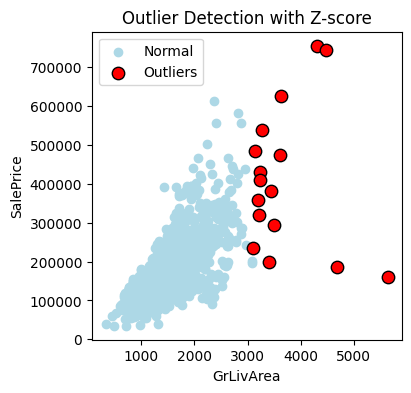

In [34]:


# Compute z-scores
z_scores = np.abs(stats.zscore(train["GrLivArea"]))
outlier_mask = z_scores > 3  # mark outliers

# Plot all points in blue
plt.figure(figsize=(4,4))
plt.scatter(train["GrLivArea"], train["SalePrice"], c="lightblue", label="Normal")

# Overlay outliers in red
plt.scatter(train.loc[outlier_mask, "GrLivArea"], 
            train.loc[outlier_mask, "SalePrice"], 
            c="red", edgecolor="black", s=80, label="Outliers")

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.title("Outlier Detection with Z-score")
plt.show()


In [ ]:
# # Drop rows where GrLivArea is very high and SalePrice is low
outlier_mask = (train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)
train = train.loc[~outlier_mask]

# upper_limit = train['SalePrice'].quantile(0.99)
# train['SalePrice'] = np.where(train['SalePrice'] > upper_limit,
#                               upper_limit,
#                               train['SalePrice'])